### ASSIGNMENT
#### 1) EXPLORE LINEAR DISCRIMINANT ANALYSIS BY VISITING THE WEBSITE OF SCIKIT LEARN
#### 2) USE LDA TO CLASSIFY WINES USING WINE DATASET AS TRAINING DATA
#### 3) CARRY OUT THE COMPARATIVE ANALYSIS OF DIFFERENT CLASSIFICATION METHODS FOR CLASSIFYING WINE IN TO ONE OF THE THREE CATEGORIES.

In [1]:
import numpy as np
import pandas as pd

### Classification Using LDA

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
wine = datasets.load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 854987)

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [4]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [5]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[19  0  0]
 [ 6 22  1]
 [ 0  0 11]]


In [7]:
LDA_train_score = classifier.score(X_train,y_train)
LDA_test_score = classifier.score(X_test,y_test)
print("training accuracy:",LDA_train_score)
print("test accuracy:",LDA_test_score)

training accuracy: 0.9831932773109243
test accuracy: 0.8813559322033898


### Classification using K Nearest Neighbours

In [8]:
from sklearn.neighbors import KNeighborsClassifier
wine_1 = datasets.load_wine()
X1 = wine_1.data
y1 = wine_1.target
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state = 854987)

In [9]:
knn = KNeighborsClassifier(n_neighbors=6)
 
knn.fit(X_train1, y_train1)
 
# Predict on dataset which model has not seen before
print(knn.predict(X_test1))

[1 1 1 1 2 0 1 2 0 0 0 0 1 1 1 2 0 1 2 1 2 1 0 0 0 1 2 1 0 2 0 0 1 0 0 0 0
 2 2 2 2 0 0 0 2 0 2 1 2 1 0 1 2 0 2 1 2 0 0]


In [10]:
# Compute training and test data accuracy
train_accuracy = knn.score(X_train1, y_train1)
test_accuracy = knn.score(X_test1, y_test1)
print("train accuracy:",train_accuracy)
print("test accuracy:",test_accuracy)

train accuracy: 0.8067226890756303
test accuracy: 0.6610169491525424


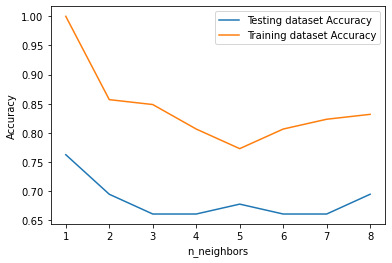

In [11]:
import matplotlib.pyplot as plt

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1, y_train1)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train1, y_train1)
    test_accuracy[i] = knn.score(X_test1, y_test1)
 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

**Observation:-
Accuracy of LDA (0.8813) is higher than that of KNN (0.6610) for classification of wines.**
